<a href="https://colab.research.google.com/github/AvinashTiwari/MachineLearning/blob/master/Training_Deep_Learning_Model_tensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import tensorflow as tf
import numpy as np
import warnings
from zipfile import ZipFile
warnings.filterwarnings("ignore")
width = 224
height = 224
batch = 32
data_directory = "dataset"

In [21]:
with ZipFile("./face_mask_no_Mask_dataset.zip", 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [22]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.3,
                                                                    subset="training",
                                                                    seed=50,
                                                                    image_size=(height,width),
                                                                    batch_size=batch)


Found 3692 files belonging to 2 classes.
Using 2585 files for training.


In [23]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split=0.3,
                                                                    subset="validation",
                                                                    seed=50,
                                                                    image_size=(height,width),
                                                                    batch_size=batch)


Found 3692 files belonging to 2 classes.
Using 1107 files for validation.


In [24]:
training_data.class_names

['with_mask', 'without_mask']

In [25]:
classes = training_data.class_names
classes

['with_mask', 'without_mask']

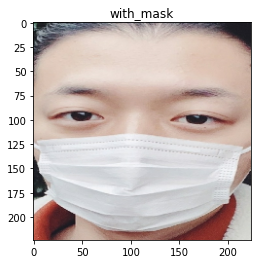

In [26]:
import matplotlib.pyplot as plt
for images , labels in training_data.take(1):
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.title(classes[labels[1]])

In [28]:
from tensorflow.keras.applications  import MobileNetV2
model = MobileNetV2(weights="imagenet")

14536120/14536120 [==============================] - 1s 0us/step


In [30]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [32]:
model.compile(optimizer ="adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
              )

In [35]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True, min_delta=0.1)

In [ ]:
model.fit(training_data,
          validation_data=validation_data,
          epochs=15, 
          callbacks=[es])

Epoch 1/15
50/81 [=================>............] - ETA: 4:11 - loss: 0.3681 - accuracy: 0.9431

In [ ]:
model.save("d-model.save", save_format="h5")

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
model.save('/content/gdrive/My Drive/d-model.save')